# Interpolacja funkci Rungego w poszczególnych węzłach

## Węzły równoodległe

In [1]:
Wezly = [-1,-1+2/9,-1+4/9,-1+6/9,-1+8/9,-1+10/9,-1+12/9,-1+14/9,-1+16/9,1] #Równoodlegle
using QuadGK
A=Array{BigFloat,1}(undef, 10)
N=10

10

In [2]:
function mod(x)
    if x>=0
        return x
    end
    return -x
end

mod (generic function with 1 method)

### Funkcja Rungego

In [3]:
function Runge(x)
    return 1/(25*x^2+1)
end

Runge (generic function with 1 method)

### Wielomian węzłowy

In [4]:
function p(k,x)
    result=1
    for i=1:k-1
        result*=(x-Wezly[i])
    end
    return result
end

p (generic function with 1 method)

### Ilorazy różnicowe

In [5]:
function bk()
    for i=1:10
        A[i]=Runge(Wezly[i])
    end
    for j=2:10
        k=10
        while k>=j
            A[k]=(A[k]-A[k-1])/(Wezly[k]-Wezly[k-j+1])
            k-=1
        end
    end
end

bk (generic function with 1 method)

### Wielomian interpolacyjny

In [6]:
function Newton(x)
    sum=0.0
    for k=1:10
        sum+=A[k]*p(k,x)
    end
    return sum
end

Newton (generic function with 1 method)

### Wykres

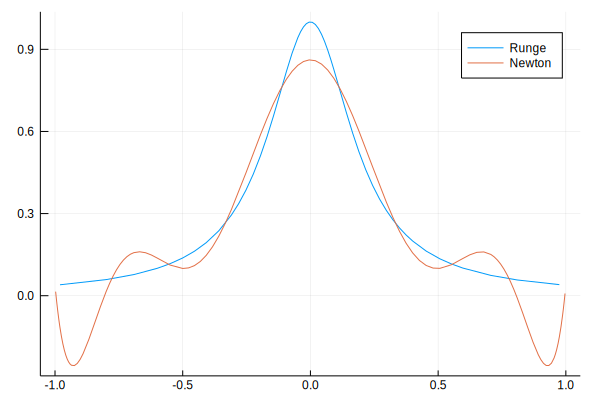

In [7]:
using Plots
bk()
plot(Runge, -1, 1, label="Runge")
plot!(Newton, -1 ,1, label="Newton")

## Węzły będące zerami 10 wielomianu Czebyszewa

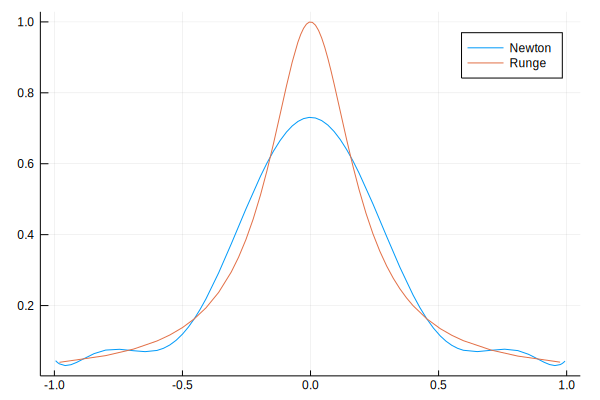

In [8]:
for i=0:9
    Wezly=map(j->cos(pi*((2*j-1)/(2*10))), [1:10;])
end
bk()
plot(Newton, -1, 1, label="Newton")
plot!(Runge, -1, 1, label="Runge")

## Węzły będące ekstremami 9 wielomianu Czebyszewa

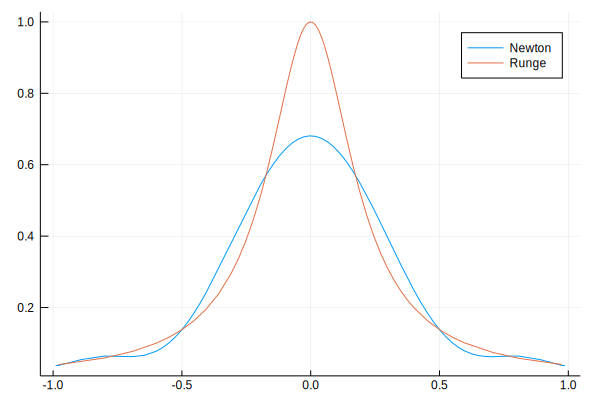

In [9]:

for i=0:9
    Wezly[10-i]=cos((i*pi)/9)
end
bk()
plot(Newton, -1, 1, label="Newton")
plot!(Runge, -1, 1, label="Runge")

### Wielomiany Czebyszewa

In [10]:
function T(k,x)
    return cos(k*acos(x))
end

T (generic function with 1 method)

## Wielomian optymalny dla normy średniokwadratowej z wagą $p(x) = \frac{1}{\sqrt{1-x^{2}}}$

In [11]:
T0(x)=T(0,x)
T1(x)=T(1,x)
T2(x)=T(2,x)
T3(x)=T(3,x)
T4(x)=T(4,x)
T5(x)=T(5,x)
T6(x)=T(6,x)
T7(x)=T(7,x)
T8(x)=T(8,x)
T9(x)=T(9,x)
T10(x)=T(10,x)
Tr=[T0, T1, T2, T3, T4, T5, T6, T7, T8, T9, T10]

11-element Array{Function,1}:
 T0 
 T1 
 T2 
 T3 
 T4 
 T5 
 T6 
 T7 
 T8 
 T9 
 T10

### Funkcja wagowa

In [12]:
function waga(x)
    return 1/(1-x^2)^(1/2)
end

waga (generic function with 1 method)

### Funkcja podcałkowa iloczynu skalarnego

In [13]:
function doskalaru(f,g,w,x)
    return f(x)*g(x)*w(x)
end

doskalaru (generic function with 1 method)

### Iloczyn skalarny

In [14]:
function skalar(f,g)
    h(x)=doskalaru(f,g,waga,x)
    return quadgk(h, -0.99999999, 0.99999999)
end

skalar (generic function with 1 method)

### Tablica iloczynów skalarnych (dla przyspieszenia obliczeń)

In [15]:
Sk = Array{BigFloat,1}(undef, 10)
for i=1:10
    Sk[i]=skalar(Runge, Tr[i])[1]/skalar(Tr[i], Tr[i])[1]
end

### Wielomian optymalny

In [16]:
function w(x)
    sum=0.0
    for i=1:10
        sum+=Sk[i]*Tr[i](x)
    end
    return sum
end

w (generic function with 1 method)

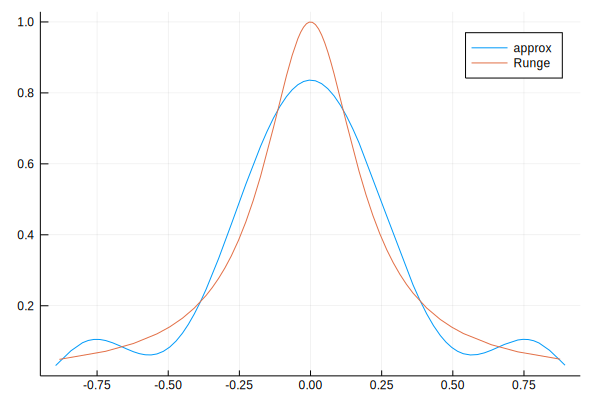

In [17]:
plot(w, -0.9,0.9, label="approx")
plot!(Runge, -0.9,0.9, label="Runge")

## Wielomian optymalny z funkcją wagową $p(x)=1$

In [18]:
function waga(x)
    return 1
end

waga (generic function with 1 method)

### Wielomiany Legendre'a

In [19]:
function L(k,x)
    if k==0
        return 1
    end
    if k==1
        return x
    end
    return ((2*k-1)*x*L(k-1,x) - (k-1)*L(k-2, x))/k
end

L (generic function with 1 method)

In [20]:
T0(x)=L(0,x)
T1(x)=L(1,x)
T2(x)=L(2,x)
T3(x)=L(3,x)
T4(x)=L(4,x)
T5(x)=L(5,x)
T6(x)=L(6,x)
T7(x)=L(7,x)
T8(x)=L(8,x)
T9(x)=L(9,x)
T10(x)=L(10,x)
Lr=[T0, T1, T2, T3, T4, T5, T6, T7, T8, T9, T10]

11-element Array{Function,1}:
 T0 
 T1 
 T2 
 T3 
 T4 
 T5 
 T6 
 T7 
 T8 
 T9 
 T10

### Tablica iloczynów skalarnych

In [21]:
Sk = Array{BigFloat,1}(undef, 10)
for i=1:10
    Sk[i]=skalar(Runge, Lr[i])[1]/skalar(Lr[i], Lr[i])[1]
end

### Wielomian optymalny

In [22]:
function w(x)
    sum=0.0
    for i=1:10
        sum+=Sk[i]*Lr[i](x)
    end
    return sum
end

w (generic function with 1 method)

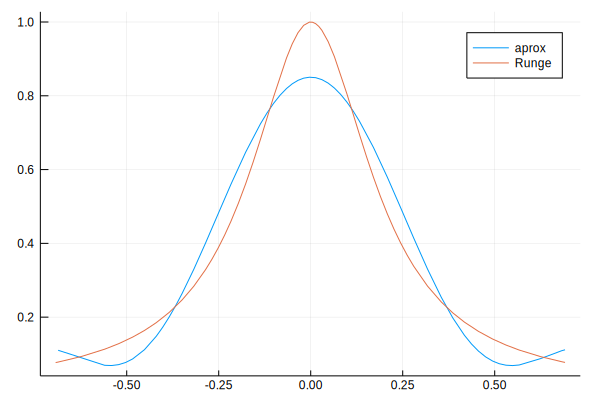

In [23]:
plot(w, -0.7,0.7, label="aprox")
plot!(Runge, -0.7,0.7, label="Runge")